In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
sns.set()
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

In [2]:
raw_poverty_df = pd.read_csv('poverty_statistics.csv')

raw_voter_df = pd.read_csv('voter_turnout.csv')

raw_presidential_vs_midterm_df = pd.read_csv('presidential_vs_midterm.csv')

raw_extra_poverty_statistics_df = pd.read_csv('extra_poverty_statistics.csv')

In [3]:
raw_poverty_df.head()

,Year,Percent Change in People in Poverty Over the Next Two Years(%),Unnamed: 2,Percent of people in poverty (%),Unnamed: 4,Unnamed: 5,Comparison1,Under 18 years (%),Unnamed: 8,Unnamed: 9,...,"Female householder, no spouse present with children (%)",Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Comparison4,White (%),Unnamed: 26,Comparison5
0,1960,-0.012,NaN,0.222,NaN,NaN,0.210,0.269,NaN,NaN,...,0.563,NaN,NaN,NaN,NaN,NaN,0.597,0.178,NaN,0.164
1,1962,-0.020,NaN,0.210,NaN,NaN,0.190,0.250,NaN,NaN,...,0.597,NaN,NaN,NaN,NaN,NaN,0.497,0.164,NaN,0.149
2,1964,-0.043,NaN,0.190,NaN,NaN,0.147,0.230,NaN,NaN,...,0.497,NaN,NaN,NaN,NaN,NaN,0.471,0.149,NaN,0.113
3,1966,-0.019,NaN,0.147,NaN,NaN,0.128,0.176,NaN,NaN,...,0.471,NaN,NaN,NaN,NaN,NaN,0.446,0.113,NaN,0.100
4,1968,-0.002,NaN,0.128,NaN,NaN,0.126,0.156,NaN,NaN,...,0.446,NaN,NaN,NaN,NaN,NaN,0.438,0.100,NaN,0.099


In [4]:
raw_poverty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 28 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Year                                                             30 non-null     int64  
 1   Percent Change in People in Poverty Over the Next Two Years(%)   30 non-null     float64
 2   Unnamed: 2                                                       0 non-null      float64
 3   Percent of people in poverty (%)                                 30 non-null     float64
 4   Unnamed: 4                                                       0 non-null      float64
 5   Unnamed: 5                                                       0 non-null      float64
 6   Comparison1                                                      30 non-null     float64
 7           Under 18 years (%)                    

In [5]:
raw_extra_poverty_statistics_df.head()

,Years,18 to 64 years (%),65+ years (%),Married couple families without children (%),Married couple families with children (%),Persons not in families/Unrelated individuals (%),"Male householder, no spouse present with children (%)","Female householder, no spouse present with children (%)",White (%),Black (%),...,South Dakota (%),Tennessee (%),Texas (%),Utah (%),Vermont (%),Virginia (%),Washington (%),West Virginia (%),Wisconsin (%),Wyoming (%)
0,1980,0.101,0.157,0.045,0.077,0.086,0.180,0.429,0.102,0.325,...,0.188,0.196,0.157,0.100,0.120,0.124,0.127,0.152,0.085,0.104
1,1982,0.120,0.146,0.054,0.098,0.115,0.206,0.478,0.120,0.356,...,0.168,0.236,0.162,0.145,0.129,0.125,0.129,0.248,0.095,0.120
2,1984,0.117,0.124,0.045,0.094,0.106,0.181,0.457,0.115,0.338,...,0.145,0.174,0.157,0.111,0.126,0.100,0.113,0.204,0.155,0.109
3,1986,0.108,0.124,0.041,0.080,0.092,0.178,0.460,0.110,0.311,...,0.170,0.183,0.173,0.126,0.110,0.097,0.129,0.224,0.107,0.146
4,1988,0.105,0.120,0.040,0.072,0.089,0.180,0.447,0.101,0.313,...,0.142,0.180,0.180,0.098,0.081,0.108,0.087,0.179,0.078,0.096


In [6]:
raw_extra_poverty_statistics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 67 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Years                                                            20 non-null     int64  
 1           18 to 64 years (%)                                       20 non-null     float64
 2           65+ years (%)                                            20 non-null     float64
 3           Married couple families without children (%)             20 non-null     float64
 4           Married couple families with children (%)                20 non-null     float64
 5           Persons not in families/Unrelated individuals (%)        20 non-null     float64
 6           Male householder, no spouse present with children (%)    20 non-null     float64
 7           Female householder, no spouse present 

In [7]:
poverty_df = raw_poverty_df.copy()

voter_df = raw_voter_df.copy()

presidential_vs_midterm_df = raw_presidential_vs_midterm_df.copy()

extra_poverty_stats_df = raw_extra_poverty_statistics_df.copy()

In [8]:
import regex as re

poverty_list = poverty_df.columns.to_list()
poverty_columns = []

for column in poverty_list:
    column = column.replace(" ", "_")
    
    poverty_columns.append(column)
    
voter_list = voter_df.columns.to_list()
voter_columns = []

for column in voter_list:
    column = column.replace(" ", "_")
    
    voter_columns.append(column)
    
presidential_vs_midterm_list = presidential_vs_midterm_df.columns.to_list()
presidential_vs_midterm_columns = []

for column in presidential_vs_midterm_list:
    column = column.replace(" ", "_")
    
    presidential_vs_midterm_columns.append(column)
    
extra_poverty_stats_list = extra_poverty_stats_df.columns.to_list()
extra_poverty_stats_columns = []

for column in extra_poverty_stats_list:
    column = column.replace(" ", "_")
    
    extra_poverty_stats_columns.append(column)
    
extra_poverty_stats_df.columns = extra_poverty_stats_columns
poverty_df.columns = poverty_columns
voter_df.columns = voter_columns
presidential_vs_midterm_df.columns = presidential_vs_midterm_columns

In [9]:
poverty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 28 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Year                                                             30 non-null     int64  
 1   Percent_Change_in_People_in_Poverty_Over_the_Next_Two_Years(%)   30 non-null     float64
 2   Unnamed:_2                                                       0 non-null      float64
 3   Percent_of_people_in_poverty_(%)                                 30 non-null     float64
 4   Unnamed:_4                                                       0 non-null      float64
 5   Unnamed:_5                                                       0 non-null      float64
 6   Comparison1                                                      30 non-null     float64
 7   ________Under_18_years_(%)                    

In [10]:
poverty_df.drop(columns=['Unnamed:_2'], inplace=True)

In [11]:
poverty_df.drop(columns=['Comparison1'], inplace=True)

In [12]:
poverty_df.drop(columns=['Unnamed:_8'], inplace=True)

In [13]:
poverty_df.drop(columns=['Unnamed:_9'], inplace=True)

In [14]:
poverty_df.drop(columns=['Comparison2'], inplace=True)

In [15]:
poverty_df.drop(columns=['Unnamed:_12'], inplace=True)

In [16]:
poverty_df.drop(columns=['Unnamed:_13'], inplace=True)

In [17]:
poverty_df.drop(columns=['Unnamed:_14'], inplace=True)

In [18]:
poverty_df.drop(columns=['Unnamed:_15'], inplace=True)

In [19]:
poverty_df.drop(columns=['Unnamed:_16'], inplace=True)

In [20]:
poverty_df.drop(columns=['Comparison3'], inplace=True)

In [21]:
poverty_df.drop(columns=['Unnamed:_19'], inplace=True)

In [22]:
poverty_df.drop(columns=['Unnamed:_20'], inplace=True)

In [23]:
poverty_df.drop(columns=['Unnamed:_21'], inplace=True)

In [24]:
poverty_df.drop(columns=['Unnamed:_22'], inplace=True)

In [25]:
poverty_df.drop(columns=['Unnamed:_23'], inplace=True)

In [26]:
poverty_df.drop(columns=['Comparison4'], inplace=True)

In [27]:
poverty_df.drop(columns=['Unnamed:_26'], inplace=True)

In [28]:
poverty_df.drop(columns=['Comparison5'], inplace=True)

In [29]:
poverty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Year                                                             30 non-null     int64  
 1   Percent_Change_in_People_in_Poverty_Over_the_Next_Two_Years(%)   30 non-null     float64
 2   Percent_of_people_in_poverty_(%)                                 30 non-null     float64
 3   Unnamed:_4                                                       0 non-null      float64
 4   Unnamed:_5                                                       0 non-null      float64
 5   ________Under_18_years_(%)                                       30 non-null     float64
 6   ________Persons_not_in_families/Unrelated_individuals_(%)        30 non-null     float64
 7   ________Female_householder,_no_spouse_present_w

In [30]:
poverty_df['under_18_change'] = (poverty_df['________Under_18_years_(%)'] - poverty_df['________Under_18_years_(%)'].shift())

In [31]:
poverty_df['under_18_change'] = poverty_df['under_18_change'].shift(-1)

In [32]:
extra_poverty_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 67 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Years                                                            20 non-null     int64  
 1   ________18_to_64_years_(%)                                       20 non-null     float64
 2   ________65+_years_(%)                                            20 non-null     float64
 3   ________Married_couple_families_without_children_(%)             20 non-null     float64
 4   ________Married_couple_families_with_children_(%)                20 non-null     float64
 5   ________Persons_not_in_families/Unrelated_individuals_(%)        20 non-null     float64
 6   ________Male_householder,_no_spouse_present_with_children_(%)    20 non-null     float64
 7   ________Female_householder,_no_spouse_present_

In [33]:
extra_poverty_stats_df['18_to_64_change'] = (extra_poverty_stats_df['________18_to_64_years_(%)'] - extra_poverty_stats_df['________18_to_64_years_(%)'].shift())

In [34]:
extra_poverty_stats_df['18_to_64_change'] = extra_poverty_stats_df['18_to_64_change'].shift(-1)

In [35]:
extra_poverty_stats_df['65+_change'] = (extra_poverty_stats_df['________65+_years_(%)'] - extra_poverty_stats_df['________65+_years_(%)'].shift())

In [36]:
extra_poverty_stats_df['65+_change'] = extra_poverty_stats_df['65+_change'].shift(-1)

In [37]:
extra_poverty_stats_df['married_without_children_change'] = (extra_poverty_stats_df['________Married_couple_families_without_children_(%)'] - extra_poverty_stats_df['________Married_couple_families_without_children_(%)'].shift())

In [38]:
extra_poverty_stats_df['married_without_children_change'] = extra_poverty_stats_df['married_without_children_change'].shift(-1)

In [39]:
extra_poverty_stats_df['married_with_children_change'] = (extra_poverty_stats_df['________Married_couple_families_with_children_(%)'] - extra_poverty_stats_df['________Married_couple_families_with_children_(%)'].shift())

In [40]:
extra_poverty_stats_df['married_with_children_change'] = extra_poverty_stats_df['married_with_children_change'].shift(-1)

In [41]:
extra_poverty_stats_df['out_of_families_change'] = (extra_poverty_stats_df['________Persons_not_in_families/Unrelated_individuals_(%)'] - extra_poverty_stats_df['________Persons_not_in_families/Unrelated_individuals_(%)'].shift())

In [42]:
extra_poverty_stats_df['out_of_families_change'] = extra_poverty_stats_df['out_of_families_change'].shift(-1)

In [43]:
extra_poverty_stats_df['single_father_change'] = (extra_poverty_stats_df['________Male_householder,_no_spouse_present_with_children_(%)'] - extra_poverty_stats_df['________Male_householder,_no_spouse_present_with_children_(%)'].shift())

In [44]:
extra_poverty_stats_df['single_father_change'] = extra_poverty_stats_df['single_father_change'].shift(-1)

In [45]:
extra_poverty_stats_df['single_mother_change'] = (extra_poverty_stats_df['________Female_householder,_no_spouse_present_with_children_(%)'] - extra_poverty_stats_df['________Female_householder,_no_spouse_present_with_children_(%)'].shift())

In [46]:
extra_poverty_stats_df['single_mother_change'] = extra_poverty_stats_df['single_mother_change'].shift(-1)

In [47]:
extra_poverty_stats_df['white_change'] = (extra_poverty_stats_df['________White_(%)'] - extra_poverty_stats_df['________White_(%)'].shift())

In [48]:
extra_poverty_stats_df['white_change'] = extra_poverty_stats_df['white_change'].shift(-1)

In [49]:
extra_poverty_stats_df['black_change'] = (extra_poverty_stats_df['________Black_(%)'] - extra_poverty_stats_df['________Black_(%)'].shift())

In [50]:
extra_poverty_stats_df['black_change'] = extra_poverty_stats_df['black_change'].shift(-1)

In [51]:
extra_poverty_stats_df['hispanic_change'] = (extra_poverty_stats_df['________Hispanic_(%)'] - extra_poverty_stats_df['________Hispanic_(%)'].shift())

In [52]:
extra_poverty_stats_df['hispanic_change'] = extra_poverty_stats_df['hispanic_change'].shift(-1)

In [53]:
extra_poverty_stats_df['white_not_hispanic_change'] = (extra_poverty_stats_df['________White,_non-Hispanic_(%)'] - extra_poverty_stats_df['________White,_non-Hispanic_(%)'].shift())

In [54]:
extra_poverty_stats_df['white_not_hispanic_change'] = extra_poverty_stats_df['white_not_hispanic_change'].shift(-1)

In [55]:
extra_poverty_stats_df['northeast_change'] = (extra_poverty_stats_df['________Northeast_(%)'] - extra_poverty_stats_df['________Northeast_(%)'].shift())

In [56]:
extra_poverty_stats_df['northeast_change'] = extra_poverty_stats_df['northeast_change'].shift(-1)

In [57]:
extra_poverty_stats_df['west_change'] = (extra_poverty_stats_df['________West_(%)'] - extra_poverty_stats_df['________West_(%)'].shift())

In [58]:
extra_poverty_stats_df['west_change'] = extra_poverty_stats_df['west_change'].shift(-1)

In [59]:
extra_poverty_stats_df['south_change'] = (extra_poverty_stats_df['________South_(%)'] - extra_poverty_stats_df['________South_(%)'].shift())

In [60]:
extra_poverty_stats_df['south_change'] = extra_poverty_stats_df['south_change'].shift(-1)

In [61]:
extra_poverty_stats_df['midwest_change'] = (extra_poverty_stats_df['________Midwest_(%)'] - extra_poverty_stats_df['________Midwest_(%)'].shift())

In [62]:
extra_poverty_stats_df['midwest_change'] = extra_poverty_stats_df['midwest_change'].shift(-1)

In [63]:
extra_poverty_stats_df['alaska_change'] = (extra_poverty_stats_df['________Alaska_(%)'] - extra_poverty_stats_df['________Alaska_(%)'].shift())

In [64]:
extra_poverty_stats_df['alaska_change'] = extra_poverty_stats_df['alaska_change'].shift(-1)

In [65]:
extra_poverty_stats_df['alabama_change'] = (extra_poverty_stats_df['________Alabama_(%)'] - extra_poverty_stats_df['________Alabama_(%)'].shift())

In [66]:
extra_poverty_stats_df['alabama_change'] = extra_poverty_stats_df['alabama_change'].shift(-1)

In [67]:
extra_poverty_stats_df['arizona_change'] = (extra_poverty_stats_df['________Arizona_(%)'] - extra_poverty_stats_df['________Arizona_(%)'].shift())

In [68]:
extra_poverty_stats_df['arizona_change'] = extra_poverty_stats_df['arizona_change'].shift(-1)

In [69]:
extra_poverty_stats_df['arkansas_change'] = (extra_poverty_stats_df['________Arkansas_(%)'] - extra_poverty_stats_df['________Arkansas_(%)'].shift())

In [70]:
extra_poverty_stats_df['arkansas_change'] = extra_poverty_stats_df['arkansas_change'].shift(-1)

In [71]:
extra_poverty_stats_df['california_change'] = (extra_poverty_stats_df['________California_(%)'] - extra_poverty_stats_df['________California_(%)'].shift())

In [72]:
extra_poverty_stats_df['california_change'] = extra_poverty_stats_df['california_change'].shift(-1)

In [73]:
extra_poverty_stats_df['colorado_change'] = (extra_poverty_stats_df['________Colorado_(%)'] - extra_poverty_stats_df['________Colorado_(%)'].shift())

In [74]:
extra_poverty_stats_df['colorado_change'] = extra_poverty_stats_df['colorado_change'].shift(-1)

In [75]:
extra_poverty_stats_df['connecticut_change'] = (extra_poverty_stats_df['________Connecticut_(%)'] - extra_poverty_stats_df['________Connecticut_(%)'].shift())

In [76]:
extra_poverty_stats_df['connecticut_change'] = extra_poverty_stats_df['connecticut_change'].shift(-1)

In [77]:
extra_poverty_stats_df['delaware_change'] = (extra_poverty_stats_df['________Delaware_(%)'] - extra_poverty_stats_df['________Delaware_(%)'].shift())

In [78]:
extra_poverty_stats_df['delaware_change'] = extra_poverty_stats_df['delaware_change'].shift(-1)

In [79]:
extra_poverty_stats_df['dc_change'] = (extra_poverty_stats_df['________District_of_Columbia_(%)'] - extra_poverty_stats_df['________District_of_Columbia_(%)'].shift())

In [80]:
extra_poverty_stats_df['dc_change'] = extra_poverty_stats_df['dc_change'].shift(-1)

In [81]:
extra_poverty_stats_df['florida_change'] = (extra_poverty_stats_df['________Florida_(%)'] - extra_poverty_stats_df['________Florida_(%)'].shift())

In [82]:
extra_poverty_stats_df['florida_change'] = extra_poverty_stats_df['florida_change'].shift(-1)

In [83]:
extra_poverty_stats_df['georgia_change'] = (extra_poverty_stats_df['________Georgia_(%)'] - extra_poverty_stats_df['________Georgia_(%)'].shift())

In [84]:
extra_poverty_stats_df['georgia_change'] = extra_poverty_stats_df['georgia_change'].shift(-1)

In [85]:
extra_poverty_stats_df['hawaii_change'] = (extra_poverty_stats_df['________Hawaii_(%)'] - extra_poverty_stats_df['________Hawaii_(%)'].shift())

In [86]:
extra_poverty_stats_df['hawaii_change'] = extra_poverty_stats_df['hawaii_change'].shift(-1)

In [87]:
extra_poverty_stats_df['idaho_change'] = (extra_poverty_stats_df['________Idaho_(%)'] - extra_poverty_stats_df['________Idaho_(%)'].shift())

In [88]:
extra_poverty_stats_df['idaho_change'] = extra_poverty_stats_df['idaho_change'].shift(-1)

In [89]:
extra_poverty_stats_df['illinois_change'] = (extra_poverty_stats_df['________Illinois_(%)'] - extra_poverty_stats_df['________Illinois_(%)'].shift())

In [90]:
extra_poverty_stats_df['illinois_change'] = extra_poverty_stats_df['illinois_change'].shift(-1)

In [91]:
extra_poverty_stats_df['indiana_change'] = (extra_poverty_stats_df['________Indiana_(%)'] - extra_poverty_stats_df['________Indiana_(%)'].shift())

In [92]:
extra_poverty_stats_df['indiana_change'] = extra_poverty_stats_df['indiana_change'].shift(-1)

In [93]:
extra_poverty_stats_df['iowa_change'] = (extra_poverty_stats_df['________Iowa_(%)'] - extra_poverty_stats_df['________Iowa_(%)'].shift())

In [94]:
extra_poverty_stats_df['iowa_change'] = extra_poverty_stats_df['iowa_change'].shift(-1)

In [95]:
extra_poverty_stats_df['kansas_change'] = (extra_poverty_stats_df['________Kansas_(%)'] - extra_poverty_stats_df['________Kansas_(%)'].shift())

In [96]:
extra_poverty_stats_df['kansas_change'] = extra_poverty_stats_df['kansas_change'].shift(-1)

In [97]:
extra_poverty_stats_df['kentucky_change'] = (extra_poverty_stats_df['________Kentucky_(%)'] - extra_poverty_stats_df['________Kentucky_(%)'].shift())

In [98]:
extra_poverty_stats_df['kentucky_change'] = extra_poverty_stats_df['kentucky_change'].shift(-1)

In [99]:
extra_poverty_stats_df['louisiana_change'] = (extra_poverty_stats_df['________Louisiana_(%)'] - extra_poverty_stats_df['________Louisiana_(%)'].shift())

In [100]:
extra_poverty_stats_df['louisiana_change'] = extra_poverty_stats_df['louisiana_change'].shift(-1)

In [101]:
extra_poverty_stats_df['maine_change'] = (extra_poverty_stats_df['________Maine_(%)'] - extra_poverty_stats_df['________Maine_(%)'].shift())

In [102]:
extra_poverty_stats_df['maine_change'] = extra_poverty_stats_df['maine_change'].shift(-1)

In [103]:
extra_poverty_stats_df['maryland_change'] = (extra_poverty_stats_df['________Maryland_(%)'] - extra_poverty_stats_df['________Maryland_(%)'].shift())

In [104]:
extra_poverty_stats_df['maryland_change'] = extra_poverty_stats_df['maryland_change'].shift(-1)

In [105]:
extra_poverty_stats_df['massachusetts_change'] = (extra_poverty_stats_df['________Massachusetts_(%)'] - extra_poverty_stats_df['________Massachusetts_(%)'].shift())

In [106]:
extra_poverty_stats_df['massachusetts_change'] = extra_poverty_stats_df['massachusetts_change'].shift(-1)

In [107]:
extra_poverty_stats_df['michigan_change'] = (extra_poverty_stats_df['________Michigan_(%)'] - extra_poverty_stats_df['________Michigan_(%)'].shift())

In [108]:
extra_poverty_stats_df['michigan_change'] = extra_poverty_stats_df['michigan_change'].shift(-1)

In [109]:
extra_poverty_stats_df['minnesota_change'] = (extra_poverty_stats_df['________Minnesota_(%)'] - extra_poverty_stats_df['________Minnesota_(%)'].shift())

In [110]:
extra_poverty_stats_df['minnesota_change'] = extra_poverty_stats_df['minnesota_change'].shift(-1)

In [111]:
extra_poverty_stats_df['mississippi_change'] = (extra_poverty_stats_df['________Mississippi_(%)'] - extra_poverty_stats_df['________Mississippi_(%)'].shift())

In [112]:
extra_poverty_stats_df['mississippi_change'] = extra_poverty_stats_df['mississippi_change'].shift(-1)

In [113]:
extra_poverty_stats_df['missouri_change'] = (extra_poverty_stats_df['________Missouri_(%)'] - extra_poverty_stats_df['________Missouri_(%)'].shift())

In [114]:
extra_poverty_stats_df['missouri_change'] = extra_poverty_stats_df['missouri_change'].shift(-1)

In [115]:
extra_poverty_stats_df['montana_change'] = (extra_poverty_stats_df['________Montana_(%)'] - extra_poverty_stats_df['________Montana_(%)'].shift())

In [116]:
extra_poverty_stats_df['montana_change'] = extra_poverty_stats_df['montana_change'].shift(-1)

In [117]:
extra_poverty_stats_df['nebraska_change'] = (extra_poverty_stats_df['________Nebraska_(%)'] - extra_poverty_stats_df['________Nebraska_(%)'].shift())

In [118]:
extra_poverty_stats_df['nebraska_change'] = extra_poverty_stats_df['nebraska_change'].shift(-1)

In [119]:
extra_poverty_stats_df['nevada_change'] = (extra_poverty_stats_df['________Nevada_(%)'] - extra_poverty_stats_df['________Nevada_(%)'].shift())

In [120]:
extra_poverty_stats_df['nevada_change'] = extra_poverty_stats_df['nevada_change'].shift(-1)

In [121]:
extra_poverty_stats_df['new_hampshire_change'] = (extra_poverty_stats_df['________New_Hampshire_(%)'] - extra_poverty_stats_df['________New_Hampshire_(%)'].shift())

In [122]:
extra_poverty_stats_df['new_hampshire_change'] = extra_poverty_stats_df['new_hampshire_change'].shift(-1)

In [123]:
extra_poverty_stats_df['new_jersey_change'] = (extra_poverty_stats_df['________New_Jersey_(%)'] - extra_poverty_stats_df['________New_Jersey_(%)'].shift())

In [124]:
extra_poverty_stats_df['new_jersey_change'] = extra_poverty_stats_df['new_jersey_change'].shift(-1)

In [125]:
extra_poverty_stats_df['new_mexico_change'] = (extra_poverty_stats_df['________New_Mexico_(%)'] - extra_poverty_stats_df['________New_Mexico_(%)'].shift())

In [126]:
extra_poverty_stats_df['new_mexico_change'] = extra_poverty_stats_df['new_mexico_change'].shift(-1)

In [127]:
extra_poverty_stats_df['new_york_change'] = (extra_poverty_stats_df['________New_York_(%)'] - extra_poverty_stats_df['________New_York_(%)'].shift())

In [128]:
extra_poverty_stats_df['new_york_change'] = extra_poverty_stats_df['new_york_change'].shift(-1)

In [129]:
extra_poverty_stats_df['north_carolina_change'] = (extra_poverty_stats_df['________North_Carolina_(%)'] - extra_poverty_stats_df['________North_Carolina_(%)'].shift())

In [130]:
extra_poverty_stats_df['north_carolina_change'] = extra_poverty_stats_df['north_carolina_change'].shift(-1)

In [131]:
extra_poverty_stats_df['north_dakota_change'] = (extra_poverty_stats_df['________North_Dakota_(%)'] - extra_poverty_stats_df['________North_Dakota_(%)'].shift())

In [132]:
extra_poverty_stats_df['north_dakota_change'] = extra_poverty_stats_df['north_dakota_change'].shift(-1)

In [133]:
extra_poverty_stats_df['ohio_change'] = (extra_poverty_stats_df['________Ohio_(%)'] - extra_poverty_stats_df['________Ohio_(%)'].shift())

In [134]:
extra_poverty_stats_df['ohio_change'] = extra_poverty_stats_df['ohio_change'].shift(-1)

In [135]:
extra_poverty_stats_df['oklahoma_change'] = (extra_poverty_stats_df['________Oklahoma_(%)'] - extra_poverty_stats_df['________Oklahoma_(%)'].shift())

In [136]:
extra_poverty_stats_df['oklahoma_change'] = extra_poverty_stats_df['oklahoma_change'].shift(-1)

In [137]:
extra_poverty_stats_df['oregon_change'] = (extra_poverty_stats_df['________Oregon_(%)'] - extra_poverty_stats_df['________Oregon_(%)'].shift())

In [138]:
extra_poverty_stats_df['oregon_change'] = extra_poverty_stats_df['oregon_change'].shift(-1)

In [139]:
extra_poverty_stats_df['pennsylvania_change'] = (extra_poverty_stats_df['________Pennsylvania_(%)'] - extra_poverty_stats_df['________Pennsylvania_(%)'].shift())

In [140]:
extra_poverty_stats_df['pennsylvania_change'] = extra_poverty_stats_df['pennsylvania_change'].shift(-1)

In [141]:
extra_poverty_stats_df['rhode_island_change'] = (extra_poverty_stats_df['________Rhode_Island_(%)'] - extra_poverty_stats_df['________Rhode_Island_(%)'].shift())

In [142]:
extra_poverty_stats_df['rhode_island_change'] = extra_poverty_stats_df['rhode_island_change'].shift(-1)

In [143]:
extra_poverty_stats_df['south_carolina_change'] = (extra_poverty_stats_df['________South_Carolina_(%)'] - extra_poverty_stats_df['________South_Carolina_(%)'].shift())

In [144]:
extra_poverty_stats_df['south_carolina_change'] = extra_poverty_stats_df['south_carolina_change'].shift(-1)

In [145]:
extra_poverty_stats_df['south_dakota_change'] = (extra_poverty_stats_df['________South_Dakota_(%)'] - extra_poverty_stats_df['________South_Dakota_(%)'].shift())

In [146]:
extra_poverty_stats_df['south_dakota_change'] = extra_poverty_stats_df['south_dakota_change'].shift(-1)

In [147]:
extra_poverty_stats_df['tennessee_change'] = (extra_poverty_stats_df['________Tennessee_(%)'] - extra_poverty_stats_df['________Tennessee_(%)'].shift())

In [148]:
extra_poverty_stats_df['tennessee_change'] = extra_poverty_stats_df['tennessee_change'].shift(-1)

In [149]:
extra_poverty_stats_df['texas_change'] = (extra_poverty_stats_df['________Texas_(%)'] - extra_poverty_stats_df['________Texas_(%)'].shift())

In [150]:
extra_poverty_stats_df['texas_change'] = extra_poverty_stats_df['texas_change'].shift(-1)

In [151]:
extra_poverty_stats_df['utah_change'] = (extra_poverty_stats_df['________Utah_(%)'] - extra_poverty_stats_df['________Utah_(%)'].shift())

In [152]:
extra_poverty_stats_df['utah_change'] = extra_poverty_stats_df['utah_change'].shift(-1)

In [153]:
extra_poverty_stats_df['vermont_change'] = (extra_poverty_stats_df['________Vermont_(%)'] - extra_poverty_stats_df['________Vermont_(%)'].shift())

In [154]:
extra_poverty_stats_df['vermont_change'] = extra_poverty_stats_df['vermont_change'].shift(-1) 

In [155]:
extra_poverty_stats_df['virginia_change'] = (extra_poverty_stats_df['________Virginia_(%)'] - extra_poverty_stats_df['________Virginia_(%)'].shift())

In [156]:
extra_poverty_stats_df['virginia_change'] = extra_poverty_stats_df['virginia_change'].shift(-1)

In [157]:
extra_poverty_stats_df['washington_change'] = (extra_poverty_stats_df['________Washington_(%)'] - extra_poverty_stats_df['________Washington_(%)'].shift())

In [158]:
extra_poverty_stats_df['washington_change'] = extra_poverty_stats_df['washington_change'].shift(-1)

In [159]:
extra_poverty_stats_df['west_virginia_change'] = (extra_poverty_stats_df['________West_Virginia_(%)'] - extra_poverty_stats_df['________West_Virginia_(%)'].shift())

In [160]:
extra_poverty_stats_df['west_virginia_change'] = extra_poverty_stats_df['west_virginia_change'].shift(-1) 

In [161]:
extra_poverty_stats_df['wisconsin_change'] = (extra_poverty_stats_df['________Wisconsin_(%)'] - extra_poverty_stats_df['________Wisconsin_(%)'].shift())

In [162]:
extra_poverty_stats_df['wisconsin_change'] = extra_poverty_stats_df['wisconsin_change'].shift(-1) 

In [163]:
extra_poverty_stats_df['wyoming_change'] = (extra_poverty_stats_df['________Wyoming_(%)'] - extra_poverty_stats_df['________Wyoming_(%)'].shift())

In [164]:
extra_poverty_stats_df['wyoming_change'] = extra_poverty_stats_df['wyoming_change'].shift(-1) 

In [165]:
poverty_df.columns = poverty_df.columns.str.lower()

voter_df.columns = voter_df.columns.str.lower()

presidential_vs_midterm_df.columns = presidential_vs_midterm_df.columns.str.lower()

extra_poverty_stats_df.columns = extra_poverty_stats_df.columns.str.lower()

In [166]:
extra_poverty_stats_df = extra_poverty_stats_df.dropna()

In [167]:
extra_poverty_stats_df

,years,________18_to_64_years_(%),________65+_years_(%),________married_couple_families_without_children_(%),________married_couple_families_with_children_(%),________persons_not_in_families/unrelated_individuals_(%),"________male_householder,_no_spouse_present_with_children_(%)","________female_householder,_no_spouse_present_with_children_(%)",________white_(%),________black_(%),...,south_dakota_change,tennessee_change,texas_change,utah_change,vermont_change,virginia_change,washington_change,west_virginia_change,wisconsin_change,wyoming_change
0,1980,0.101,0.157,0.045,0.077,0.086,0.180,0.429,0.102,0.325,...,-0.020,0.040,0.005,0.045,0.009,0.001,0.002,0.096,0.010,0.016
1,1982,0.120,0.146,0.054,0.098,0.115,0.206,0.478,0.120,0.356,...,-0.023,-0.062,-0.005,-0.034,-0.003,-0.025,-0.016,-0.044,0.060,-0.011
2,1984,0.117,0.124,0.045,0.094,0.106,0.181,0.457,0.115,0.338,...,0.025,0.009,0.016,0.015,-0.016,-0.003,0.016,0.020,-0.048,0.037
3,1986,0.108,0.124,0.041,0.080,0.092,0.178,0.460,0.110,0.311,...,-0.028,-0.003,0.007,-0.028,-0.029,0.011,-0.042,-0.045,-0.029,-0.050
4,1988,0.105,0.120,0.040,0.072,0.089,0.180,0.447,0.101,0.313,...,-0.009,-0.011,-0.021,-0.016,0.028,0.003,0.002,0.002,0.015,0.014
5,1990,0.107,0.122,0.037,0.078,0.085,0.188,0.445,0.107,0.319,...,0.018,0.001,0.024,0.012,-0.004,-0.016,0.023,0.042,0.016,-0.007
6,1992,0.119,0.129,0.042,0.086,0.104,0.225,0.462,0.119,0.334,...,-0.006,-0.024,0.008,-0.014,-0.029,0.012,0.005,-0.037,-0.019,-0.010
7,1994,0.119,0.117,0.039,0.083,0.113,0.226,0.440,0.117,0.306,...,-0.027,0.013,-0.025,-0.003,0.050,0.016,0.002,-0.001,-0.002,0.026
8,1996,0.114,0.108,0.038,0.075,0.095,0.200,0.419,0.112,0.284,...,-0.010,-0.025,-0.015,0.013,-0.027,-0.035,-0.030,-0.007,0.000,-0.013
9,1998,0.105,0.105,0.037,0.069,0.087,0.166,0.387,0.105,0.261,...,-0.001,0.001,0.004,-0.014,0.001,-0.005,0.019,-0.031,0.005,0.002


In [168]:
voter_df

,year,u.s_federal_voter_turnout_rate
0,1960,63.8
1,1962,47.7
2,1964,62.8
3,1966,48.7
4,1968,62.5
5,1970,47.3
6,1972,56.2
7,1974,39.1
8,1976,54.8
9,1978,39.0


In [169]:
short_federal_df = voter_df.drop([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 29, 30], axis=0)

In [195]:
voter_list = presidential_vs_midterm_df['united_states_presidential_vep_turnout_rate']
voter_columns = []

for column in voter_list:
    column = column.replace(",", ".")
    
    voter_columns.append(column)
    
presidential_vs_midterm_df['united_states_presidential_vep_turnout_rate'] = voter_columns

In [196]:
presidential_vs_midterm_df['united_states_presidential_vep_turnout_rate'] = presidential_vs_midterm_df['united_states_presidential_vep_turnout_rate'].astype(float)

In [170]:
short_federal_df

,year,u.s_federal_voter_turnout_rate
10,1980,54.2
11,1982,42.0
12,1984,55.2
13,1986,38.1
14,1988,52.8
15,1990,38.4
16,1992,58.1
17,1994,41.1
18,1996,51.7
19,1998,38.1


In [171]:
presidential_vs_midterm_df.head()

,year,united_states_presidential_vep_turnout_rate,year.1,united_states_vep_midterm_turnout_rate
0,1960,63.8,1962,47.7
1,1964,62.8,1966,48.7
2,1968,62.5,1970,47.3
3,1972,56.2,1974,39.1
4,1976,54.8,1978,39.0


In [172]:
short_presidential_df = presidential_vs_midterm_df['united_states_presidential_vep_turnout_rate']

In [173]:
short_presidential_df = short_presidential_df.drop([0, 1, 2, 3, 4, 15], axis=0)

In [174]:
short_midterm_df = presidential_vs_midterm_df['united_states_vep_midterm_turnout_rate']

In [175]:
short_midterm_df = short_midterm_df.drop([0, 1, 2, 3, 4, 14, 15], axis=0)

In [176]:
short_federal_df.head()

,year,u.s_federal_voter_turnout_rate
10,1980,54.2
11,1982,42.0
12,1984,55.2
13,1986,38.1
14,1988,52.8


In [177]:
for column in extra_poverty_stats_df.columns:
    print(column)

years
________18_to_64_years_(%)
________65+_years_(%)
________married_couple_families_without_children_(%)
________married_couple_families_with_children_(%)
________persons_not_in_families/unrelated_individuals_(%)
________male_householder,_no_spouse_present_with_children_(%)
________female_householder,_no_spouse_present_with_children_(%)
________white_(%)
________black_(%)
________hispanic_(%)
________white,_non-hispanic_(%)
________northeast_(%)
________west_(%)
________south_(%)
________midwest_(%)
________alabama_(%)
________alaska_(%)
________arizona_(%)
________arkansas_(%)
________california_(%)
________colorado_(%)
________connecticut_(%)
________delaware_(%)
________district_of_columbia_(%)
________florida_(%)
________georgia_(%)
________hawaii_(%)
________idaho_(%)
________illinois_(%)
________indiana_(%)
________iowa_(%)
________kansas_(%)
________kentucky_(%)
________louisiana_(%)
________maine_(%)
________maryland_(%)
________massachusetts_(%)
________michigan_(%)
_______

In [178]:
extra_poverty_stats_df = extra_poverty_stats_df.rename(columns = {'years': 'year'})

In [179]:
short_federal_vs_poverty_df = short_federal_df.merge(extra_poverty_stats_df, how='inner', on='year', left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=None, indicator=False, validate=None)

In [180]:
short_federal_vs_poverty_df = short_federal_vs_poverty_df[['u.s_federal_voter_turnout_rate', '18_to_64_change', '65+_change', 'married_without_children_change', 'married_with_children_change', 'out_of_families_change', 'single_father_change', 'single_mother_change', 'white_change', 'black_change', 'hispanic_change', 'white_not_hispanic_change', 'northeast_change', 'west_change', 'south_change', 'midwest_change', 'alaska_change', 'alabama_change', 'arizona_change', 'arkansas_change', 'california_change', 'colorado_change', 'connecticut_change', 'delaware_change', 'dc_change', 'florida_change', 'georgia_change', 'hawaii_change', 'idaho_change', 'illinois_change', 'indiana_change', 'iowa_change', 'kansas_change', 'kentucky_change', 'louisiana_change', 'maine_change', 'maryland_change', 'massachusetts_change', 'michigan_change', 'minnesota_change', 'mississippi_change', 'missouri_change', 'montana_change', 'nebraska_change', 'nevada_change', 'new_hampshire_change', 'new_jersey_change', 'new_mexico_change', 'new_york_change', 'north_carolina_change', 'north_dakota_change', 'ohio_change', 'oklahoma_change', 'oregon_change', 'pennsylvania_change', 'rhode_island_change', 'south_carolina_change', 'south_dakota_change', 'tennessee_change', 'texas_change', 'utah_change', 'vermont_change', 'virginia_change', 'washington_change', 'west_virginia_change', 'wisconsin_change', 'wyoming_change']] 

In [181]:
#sns.pairplot(short_federal_vs_poverty_df)

In [182]:
short_federal_vs_poverty_df.head()

,u.s_federal_voter_turnout_rate,18_to_64_change,65+_change,married_without_children_change,married_with_children_change,out_of_families_change,single_father_change,single_mother_change,white_change,black_change,...,south_dakota_change,tennessee_change,texas_change,utah_change,vermont_change,virginia_change,washington_change,west_virginia_change,wisconsin_change,wyoming_change
0,54.2,0.019,-0.011,0.009,0.021,0.029,0.026,0.049,0.018,0.031,...,-0.020,0.040,0.005,0.045,0.009,0.001,0.002,0.096,0.010,0.016
1,42.0,-0.003,-0.022,-0.009,-0.004,-0.009,-0.025,-0.021,-0.005,-0.018,...,-0.023,-0.062,-0.005,-0.034,-0.003,-0.025,-0.016,-0.044,0.060,-0.011
2,55.2,-0.009,0.000,-0.004,-0.014,-0.014,-0.003,0.003,-0.005,-0.027,...,0.025,0.009,0.016,0.015,-0.016,-0.003,0.016,0.020,-0.048,0.037
3,38.1,-0.003,-0.004,-0.001,-0.008,-0.003,0.002,-0.013,-0.009,0.002,...,-0.028,-0.003,0.007,-0.028,-0.029,0.011,-0.042,-0.045,-0.029,-0.050
4,52.8,0.002,0.002,-0.003,0.006,-0.004,0.008,-0.002,0.006,0.006,...,-0.009,-0.011,-0.021,-0.016,0.028,0.003,0.002,0.002,0.015,0.014


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

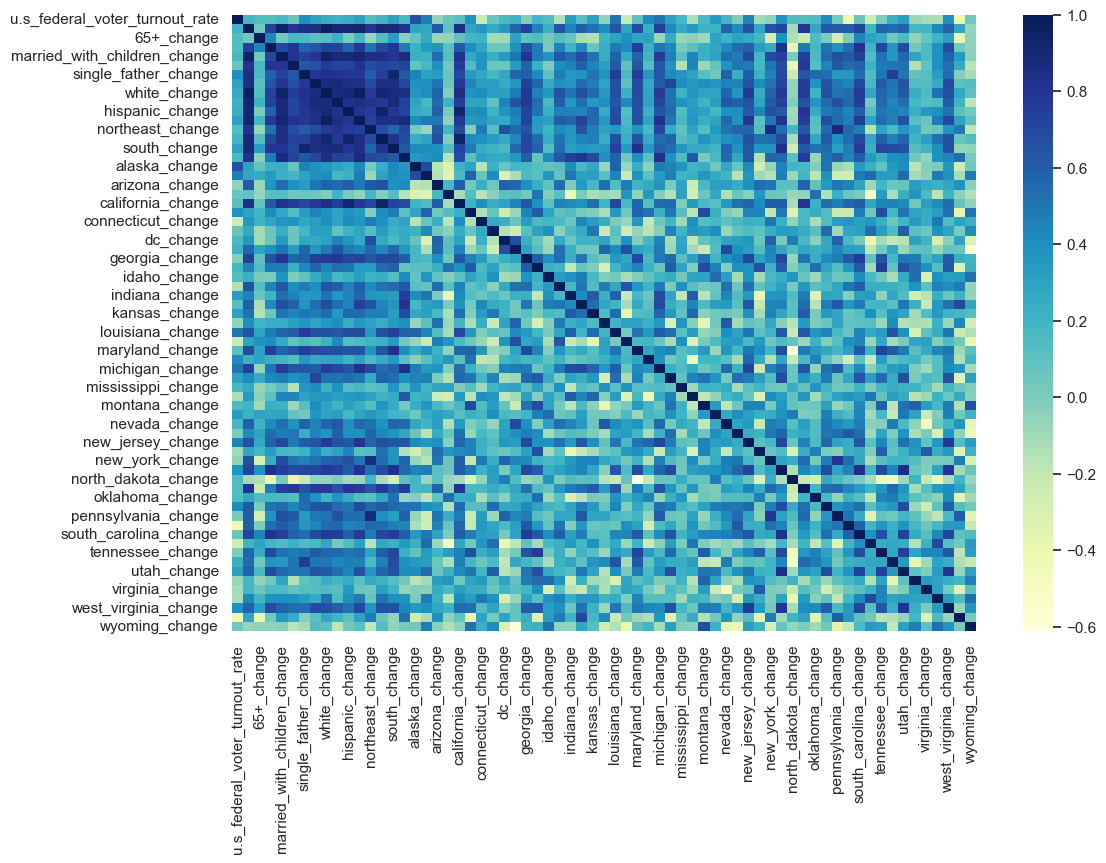

In [183]:
plt.figure(figsize=(12,8))

ax = sns.heatmap(short_federal_vs_poverty_df.corr(), annot=True, cmap='YlGnBu')

In [198]:
presidential_vs_midterm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   year                                         16 non-null     int64  
 1   united_states_presidential_vep_turnout_rate  16 non-null     float64
 2   year.1                                       16 non-null     int64  
 3   united_states_vep_midterm_turnout_rate       16 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 640.0 bytes


<Axes: xlabel='u.s_federal_voter_turnout_rate', ylabel='alaska_change'>

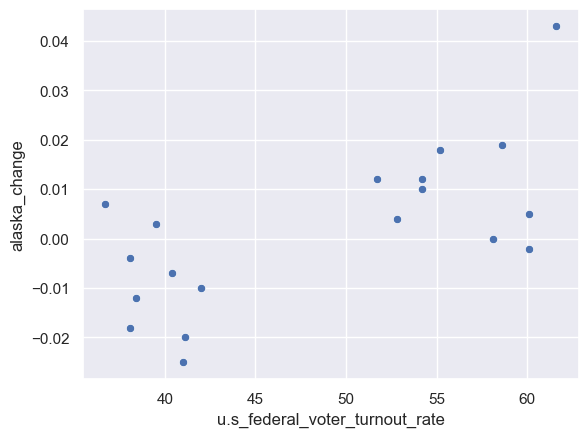

In [184]:
sns.scatterplot(x=short_federal_vs_poverty_df['u.s_federal_voter_turnout_rate'], y=short_federal_vsb_poverty_df['alaska_change'])

<Axes: xlabel='united_states_presidential_vep_turnout_rate', ylabel='alaska_change'>

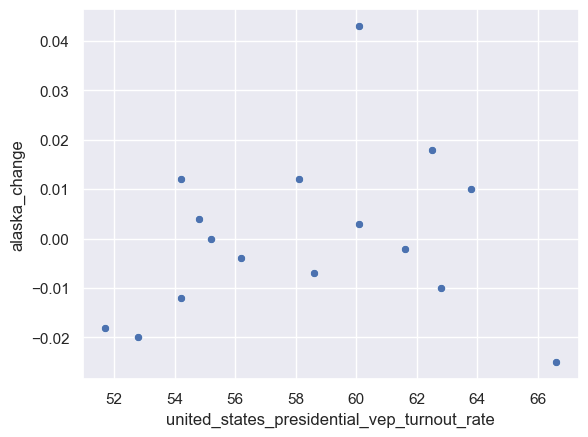

In [197]:
sns.scatterplot(x=presidential_vs_midterm_df['united_states_presidential_vep_turnout_rate'], y=short_federal_vs_poverty_df['alaska_change'])

<Axes: xlabel='united_states_vep_midterm_turnout_rate', ylabel='alaska_change'>

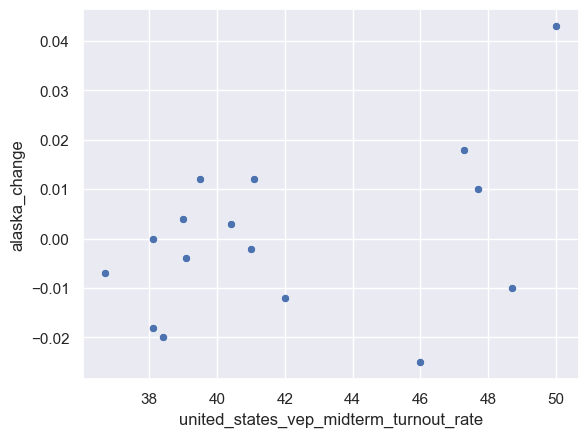

In [200]:
sns.scatterplot(x=presidential_vs_midterm_df['united_states_vep_midterm_turnout_rate'], y=short_federal_vs_poverty_df['alaska_change'])

<Axes: xlabel='u.s_federal_voter_turnout_rate', ylabel='west_virginia_change'>

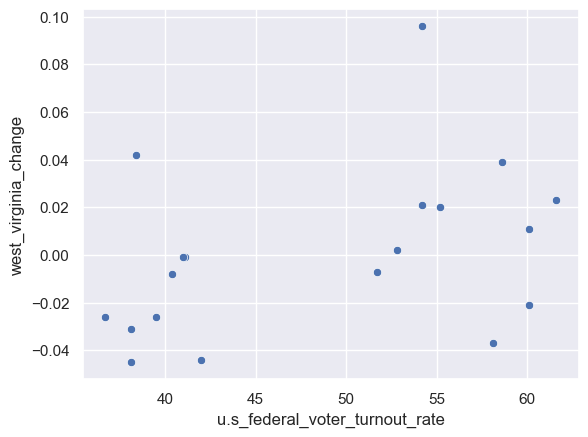

In [185]:
sns.scatterplot(x=short_federal_vs_poverty_df['u.s_federal_voter_turnout_rate'], y=short_federal_vs_poverty_df['west_virginia_change'])

<Axes: xlabel='u.s_federal_voter_turnout_rate', ylabel='utah_change'>

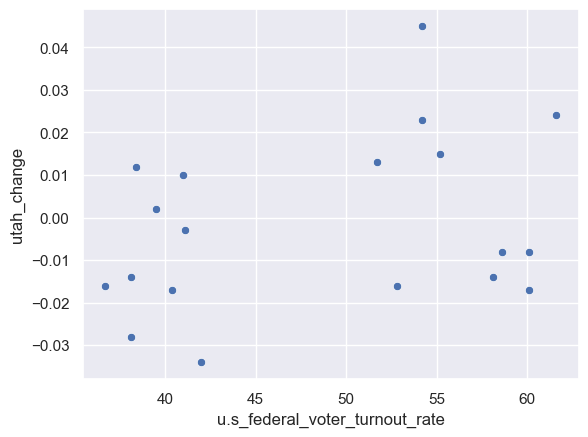

In [186]:
sns.scatterplot(x=short_federal_vs_poverty_df['u.s_federal_voter_turnout_rate'], y=short_federal_vs_poverty_df['utah_change'])

In [187]:
y = short_federal_vs_poverty_df['alaska_change']
x1 = short_federal_vs_poverty_df['u.s_federal_voter_turnout_rate']

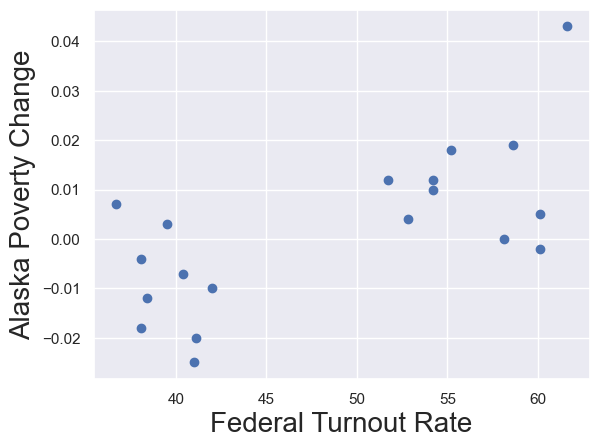

In [188]:
plt.scatter(x1,y)
plt.xlabel('Federal Turnout Rate', fontsize = 20)
plt.ylabel('Alaska Poverty Change', fontsize = 20)
plt.show()

In [189]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

C:\Users\isaac\anaconda3\envs\psycopg\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          alaska_change   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     14.04
Date:                Sun, 11 Jun 2023   Prob (F-statistic):            0.00160
Time:                        14:14:46   Log-Likelihood:                 57.821
No. Observations:                  19   AIC:                            -111.6
Df Residuals:                      17   BIC:                            -109.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.0548      0.015     -3.565      0.002      -0.087      -0.022
u.s_federal_voter_turnout_rate     0.0012      0.000      3.747      0.002       0.001       0.002
==============================================================================
Omnibus:                        0.543   Durbin-Watson:                   2.573
Prob(Omnibus):                  0.762   Jarque-Bera (JB):                0.477
Skew:                           0.335   Prob(JB):                        0.788
Kurtosis:                       2.606   Cond. No.                         271.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

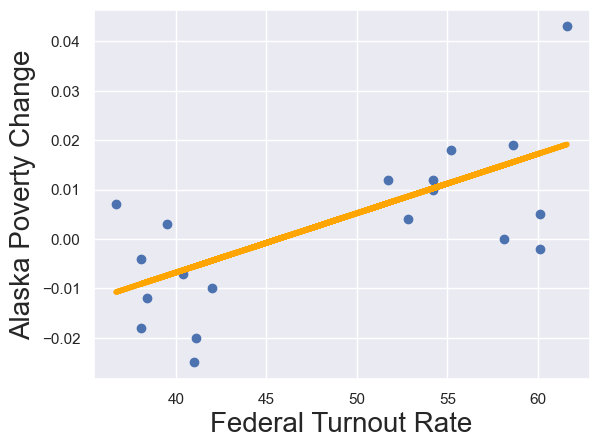

In [190]:
plt.scatter(x1,y)
yhat = 0.0012*x1 - 0.0548
fig = plt.plot(x1,yhat, lw=4, c='orange', label ='regression line')
plt.xlabel('Federal Turnout Rate', fontsize = 20)
plt.ylabel('Alaska Poverty Change', fontsize = 20)
plt.show()

In [ ]:
short_federal_vs_poverty_df.head()

In [ ]:
sns.lineplot(x=short_federal_vs_poverty_df['u.s_federal_voter_turnout_rate'], y=short_federal_vs_poverty_df['alaska_change'])